In [ ]:
import pandas as pd
# Load the dataset
file_path = '/content/Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path)

In [ ]:
# Check for missing values in the NAICS column
missing_naics = df['NAICS'].isnull().sum()
print(f"Number of rows missing NAICS data: {missing_naics}")

missing_location = df['LOCATION'].isnull().sum()
print(f"Number of rows missing LOCATION data: {missing_location}")

Number of rows missing NAICS data: 968578
Number of rows missing LOCATION data: 922721


In [ ]:
# Drop rows where the NAICS column is missing
df_cleaned = df.dropna(subset=['NAICS', 'LOCATION'])

# Verify that the rows have been dropped
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping missing NAICS data: {len(df_cleaned)}")

Original number of rows: 1593026
Number of rows after dropping missing NAICS data: 584508


In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/Listing_of_All_Businesses_Cleaned_20250202.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df_all_businesses = pd.read_csv(file_path)

# Count businesses by city
top_cities_businesses = df_all_businesses['CITY'].value_counts().head(5).reset_index()
top_cities_businesses.columns = ['City', 'Total_Businesses']

# Display the results
print("Top 5 Cities with the Most Businesses:")
display(top_cities_businesses)


Top 5 Cities with the Most Businesses:


,City,Total_Businesses
0,LOS ANGELES,286663
1,VAN NUYS,21295
2,NORTH HOLLYWOOD,17242
3,SHERMAN OAKS,15165
4,WOODLAND HILLS,13194


In [ ]:

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert 'LOCATION START DATE' and 'LOCATION END DATE' to datetime
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Find the earliest open business
earliest_business = df.loc[df['LOCATION START DATE'].idxmin()]

# Find the latest open business
latest_business = df.loc[df['LOCATION START DATE'].idxmax()]

# Display the results
print("Earliest Open Business:")
print(earliest_business[['BUSINESS NAME', 'LOCATION START DATE', 'STREET ADDRESS', 'CITY', 'ZIP CODE']])

print("\nLatest Open Business:")
print(latest_business[['BUSINESS NAME', 'LOCATION START DATE', 'STREET ADDRESS', 'CITY', 'ZIP CODE']])

Earliest Open Business:
BUSINESS NAME          A & A BUILDING MATERIAL CO
LOCATION START DATE           1921-01-01 00:00:00
STREET ADDRESS           310 N SANTA ANITA AVENUE
CITY                                      ARCADIA
ZIP CODE                               91006-2841
Name: 115031, dtype: object

Latest Open Business:
BUSINESS NAME                BRISTOL FARMS
LOCATION START DATE    2025-06-01 00:00:00
STREET ADDRESS           6220 SELMA AVENUE
CITY                           LOS ANGELES
ZIP CODE                        90028-2006
Name: 556457, dtype: object


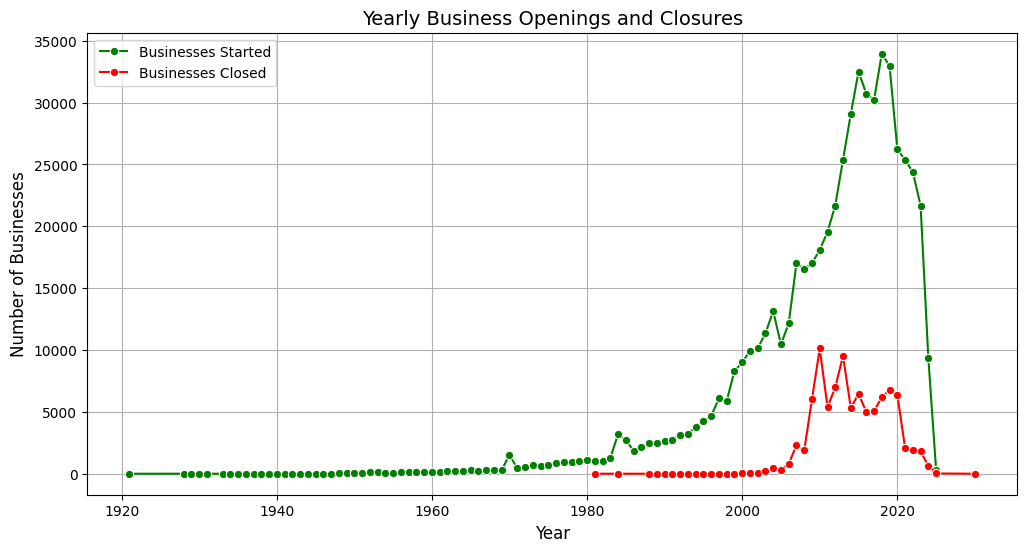

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract years
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['End_Year'] = df['LOCATION END DATE'].dt.year

# Count businesses started and closed per year
start_counts = df['Start_Year'].value_counts().sort_index()
end_counts = df['End_Year'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(12, 6))

# Plot business starts
sns.lineplot(x=start_counts.index, y=start_counts.values, marker='o', label='Businesses Started', color='green')

# Plot business closures
sns.lineplot(x=end_counts.index, y=end_counts.values, marker='o', label='Businesses Closed', color='red')

# Formatting
plt.title("Yearly Business Openings and Closures", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Businesses", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago:
            CITY  close_rate
0        CHICAGO    0.108844
1    LOS ANGELES    0.176019
2       NEW YORK    0.101266
3  SAN FRANCISCO    0.100671
4       SAN JOSE    0.121495


<ipython-input-25-4b41dbe01c40>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




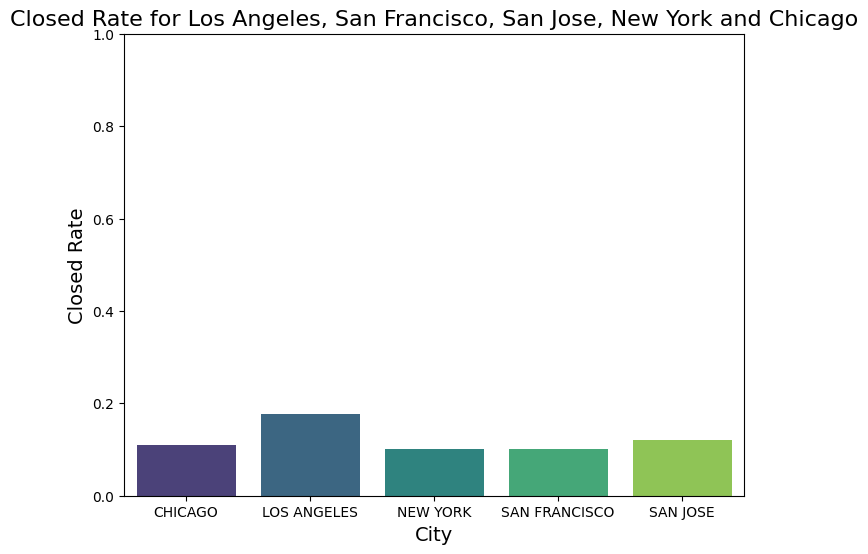

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Filter data for Los Angeles, San Francisco, and San Jose
cities_of_interest = ['LOS ANGELES', 'SAN FRANCISCO', 'SAN JOSE', 'NEW YORK', 'CHICAGO']
filtered_df = df[df['CITY'].isin(cities_of_interest)]

# Group by city and calculate the total number of businesses and opened businesses
city_stats = filtered_df.groupby('CITY').agg(
    total_businesses=('BUSINESS NAME', 'count'),  # Total number of businesses
    closed_businesses=('LOCATION END DATE', 'count')  # Number of businesses with a start date
).reset_index()

# Calculate open rate
city_stats['close_rate'] = city_stats['closed_businesses'] / city_stats['total_businesses']

# Display the results
print("Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago:")
print(city_stats[['CITY', 'close_rate']])


# Plot the closed rates using a histogram
plt.figure(figsize=(8, 6))
sns.barplot(x='CITY', y='close_rate', data=city_stats, palette='viridis')
plt.title('Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Closed Rate', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for rates
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert 'LOCATION END DATE' to datetime to identify closed businesses
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract latitude & longitude from 'LOCATION' column
df[['latitude', 'longitude']] = df['LOCATION'].str.strip('()').str.split(', ', expand=True).astype(float)

# Create a 'Closed' column (1 if closed, 0 if still open)
df['Closed'] = df['LOCATION END DATE'].notnull().astype(int)

# Remove points outside the continental U.S.
df = df[(df['latitude'].between(24, 50)) & (df['longitude'].between(-125, -66))]

# Calculate closed business rate per city
city_stats = df.groupby('CITY').agg(
    total_businesses=('BUSINESS NAME', 'count'),
    closed_businesses=('LOCATION END DATE', 'count')
).reset_index()

# Calculate closure rate
city_stats['close_rate'] = city_stats['closed_businesses'] / city_stats['total_businesses']

# Remove cities where the closed rate is exactly 0 or 1
city_stats = city_stats[(city_stats['close_rate'] > 0) & (city_stats['close_rate'] < 1)]

# Merge back to get latitude & longitude for plotting
df_city_locations = df.groupby('CITY')[['latitude', 'longitude']].mean().reset_index()
city_stats = city_stats.merge(df_city_locations, on="CITY")

# Plot scatter_mapbox with filtered closure rates
fig = px.scatter_mapbox(
    city_stats,
    lat="latitude",
    lon="longitude",
    size="close_rate",  # Bubble size represents closure rate
    color="close_rate",  # Color indicates closure rate
    hover_name="CITY",
    hover_data={"close_rate": ":.2f"},
    color_continuous_scale="reds",
    size_max=20,
    zoom=3,
    title="Closed Business Rate Across U.S. Cities (Filtered)"
)

# Update map layout
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": 37.5, "lon": -97},  # Centered over the U.S.
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the map
fig.show()


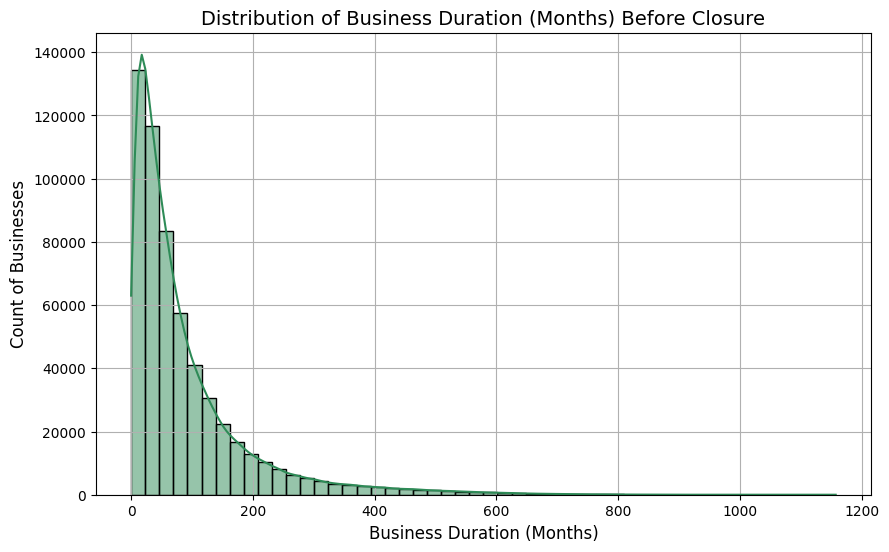

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/All_Closed_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Calculate business duration in months
df['business_duration_months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44  # Approximate months

# Drop invalid durations (negative values)
df = df[df['business_duration_months'] > 0]

# Plot histogram for business duration in months
plt.figure(figsize=(10, 6))
sns.histplot(df['business_duration_months'], bins=50, kde=True, color="seagreen")

# Formatting
plt.title("Distribution of Business Duration (Months) Before Closure", fontsize=14)
plt.xlabel("Business Duration (Months)", fontsize=12)
plt.ylabel("Count of Businesses", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
# Load the dataset
file_path = '/content/All_Closed_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


# Drop rows where the NAICS column is missing
df_cleaned = df.dropna(subset=['NAICS'])

# Verify that the rows have been dropped
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping missing NAICS data: {len(df_cleaned)}")


# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/All_Closed_Businesses_Cleaned_20250202.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Original number of rows: 578210
Number of rows after dropping missing NAICS data: 88743
Cleaned dataset saved to: /content/All_Closed_Businesses_Cleaned_20250202.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned closed businesses dataset
closed_businesses_path = "/content/All_Closed_Businesses_Cleaned_20250202.csv"
df_closed = pd.read_csv(closed_businesses_path)

# Load the NAICS sector titles dataset
naics_sector_path = "/content/naics_2_clean.csv"  # Update with correct path
df_sectors = pd.read_csv(naics_sector_path)

# Count closed businesses by city
top_cities = df_closed['CITY'].value_counts().head(10).reset_index()
top_cities.columns = ['City', 'Closed_Businesses']

# Display the results
print("Top 10 Cities with the Most Closed Businesses:")
display(top_cities)


Top 10 Cities with the Most Closed Businesses:


,City,Closed_Businesses
0,LOS ANGELES,48396
1,VAN NUYS,3369
2,NORTH HOLLYWOOD,2225
3,WOODLAND HILLS,1849
4,SHERMAN OAKS,1814
5,NORTHRIDGE,1495
6,CANOGA PARK,1329
7,ENCINO,1157
8,RESEDA,1032
9,STUDIO CITY,975


Total Closed Businesses in LOS ANGELES: 48396


<ipython-input-30-f9bf463a6d98>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




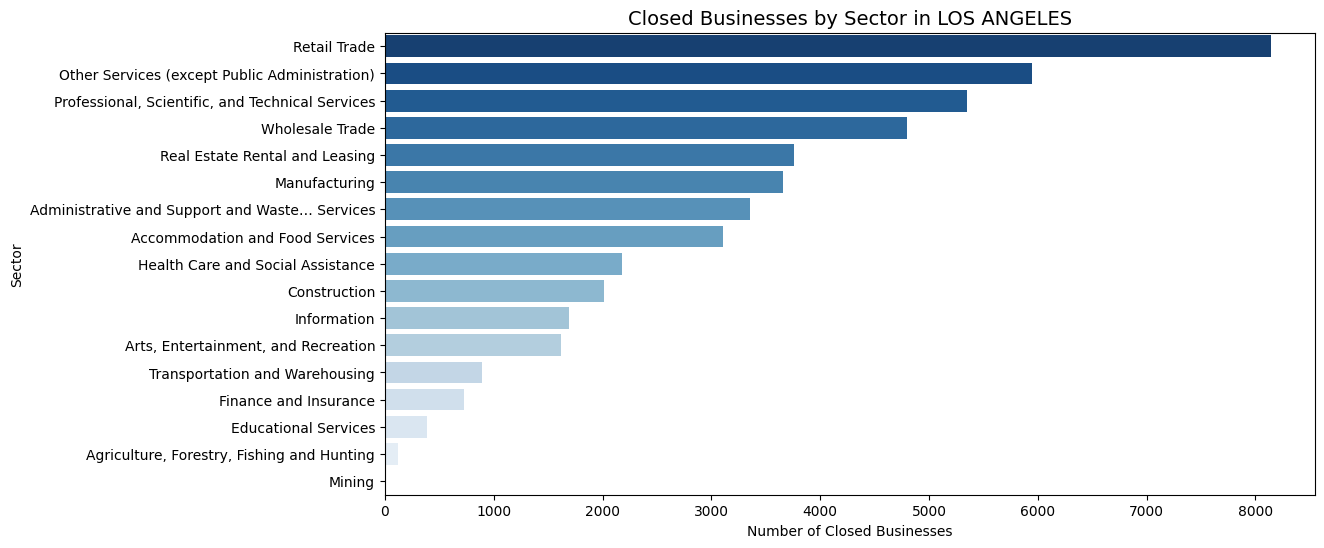

<ipython-input-30-f9bf463a6d98>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




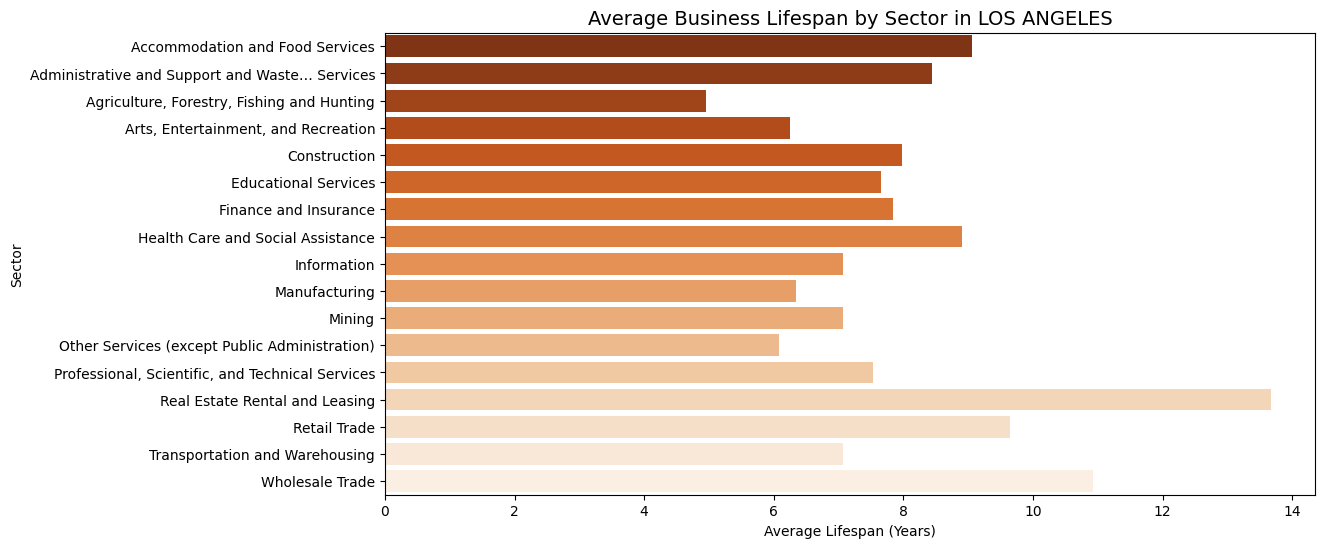

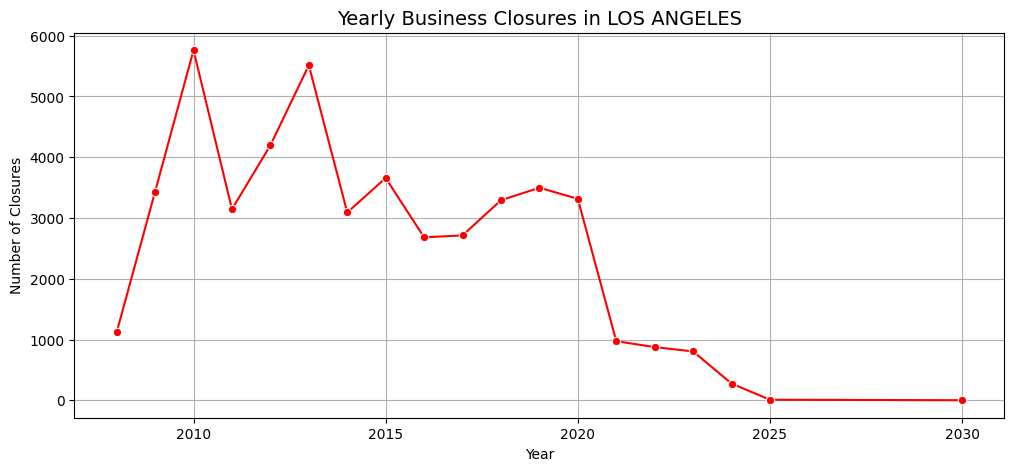

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for LOS ANGELES
df_sj = df_closed[df_closed['CITY'].str.upper() == "LOS ANGELES"].copy()

# Count the number of closed businesses in LOS ANGELES
closed_businesses_sj = df_sj.shape[0]
print(f"Total Closed Businesses in LOS ANGELES: {closed_businesses_sj}")

# Ensure NAICS column is treated as string before slicing
df_sj['NAICS_Sector_Code'] = df_sj['NAICS'].astype(str).str[:2]

# Ensure 'Code' in df_sectors is also a string for correct merging
df_sectors['Code'] = df_sectors['Code'].astype(str)

# Merge with sector titles
df_sj = df_sj.merge(df_sectors, left_on="NAICS_Sector_Code", right_on="Code", how="left")

# Convert dates to datetime format
df_sj['LOCATION START DATE'] = pd.to_datetime(df_sj['LOCATION START DATE'], errors='coerce')
df_sj['LOCATION END DATE'] = pd.to_datetime(df_sj['LOCATION END DATE'], errors='coerce')

# Calculate business duration in years
df_sj['business_duration_years'] = (df_sj['LOCATION END DATE'] - df_sj['LOCATION START DATE']).dt.days / 365.25
df_sj = df_sj[df_sj['business_duration_years'] > 0]  # Remove invalid data

# 1️⃣ Plot business closures by sector
sector_counts = df_sj['Sector_Title'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Closed_Businesses']

plt.figure(figsize=(12, 6))
sns.barplot(y=sector_counts['Sector'], x=sector_counts['Closed_Businesses'], palette="Blues_r")
plt.title("Closed Businesses by Sector in LOS ANGELES", fontsize=14)
plt.xlabel("Number of Closed Businesses")
plt.ylabel("Sector")
plt.show()

# 2️⃣ Calculate average business lifespan per sector
sector_lifespans = df_sj.groupby('Sector_Title')['business_duration_years'].mean().reset_index()
sector_lifespans.columns = ['Sector', 'Avg_Lifespan_Years']

plt.figure(figsize=(12, 6))
sns.barplot(y=sector_lifespans['Sector'], x=sector_lifespans['Avg_Lifespan_Years'], palette="Oranges_r")
plt.title("Average Business Lifespan by Sector in LOS ANGELES", fontsize=14)
plt.xlabel("Average Lifespan (Years)")
plt.ylabel("Sector")
plt.show()

# 3️⃣ Plot closures over time
df_sj['Closure_Year'] = df_sj['LOCATION END DATE'].dt.year
yearly_closures = df_sj['Closure_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_closures.index, y=yearly_closures.values, marker='o', color="red")
plt.title("Yearly Business Closures in LOS ANGELES", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Closures")
plt.grid(True)
plt.show()


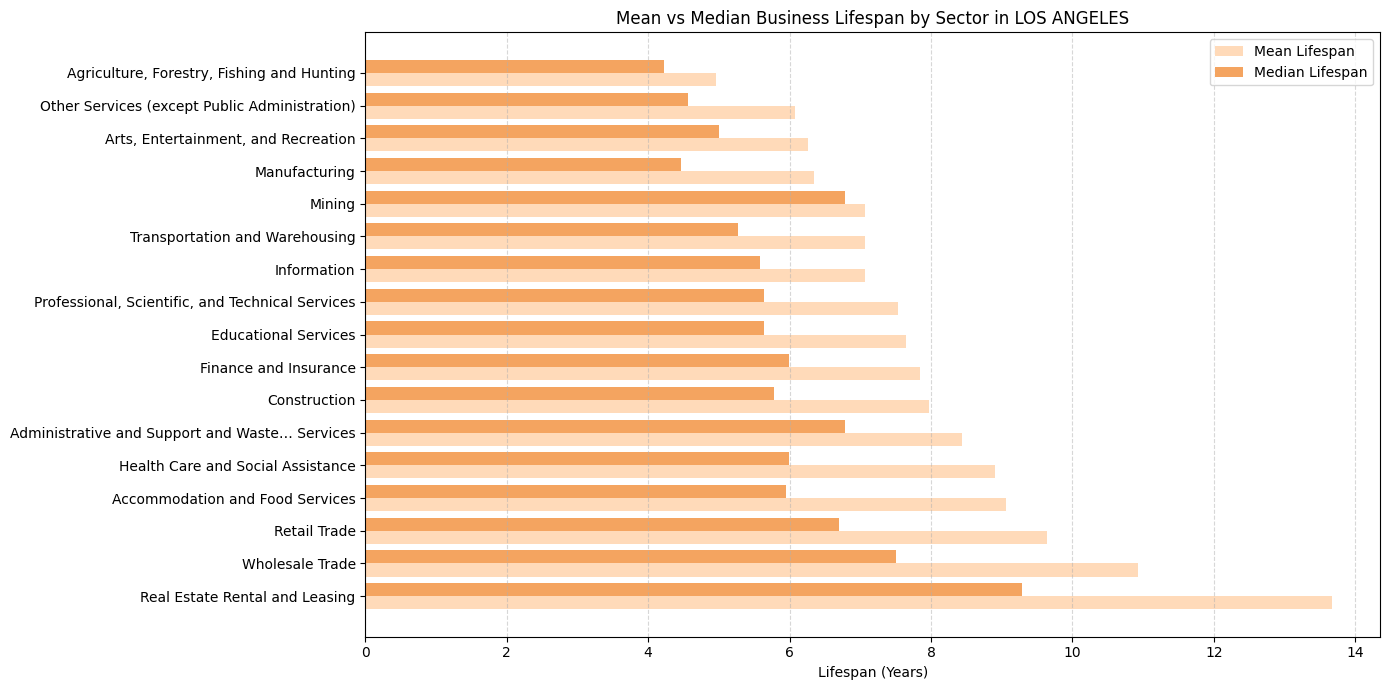

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for LOS ANGELES
df_sj = df_closed[df_closed['CITY'].str.upper() == "LOS ANGELES"].copy()

# Preprocess columns
df_sj['NAICS_Sector_Code'] = df_sj['NAICS'].astype(str).str[:2]
df_sectors['Code'] = df_sectors['Code'].astype(str)
df_sj = df_sj.merge(df_sectors, left_on="NAICS_Sector_Code", right_on="Code", how="left")

df_sj['LOCATION START DATE'] = pd.to_datetime(df_sj['LOCATION START DATE'], errors='coerce')
df_sj['LOCATION END DATE'] = pd.to_datetime(df_sj['LOCATION END DATE'], errors='coerce')
df_sj['business_duration_years'] = (df_sj['LOCATION END DATE'] - df_sj['LOCATION START DATE']).dt.days / 365.25
df_sj = df_sj[df_sj['business_duration_years'] > 0]

# Group by sector to get mean and median
grouped = df_sj.groupby('Sector_Title')['business_duration_years'].agg(['mean', 'median']).reset_index()
grouped.columns = ['Sector', 'Mean_Lifespan', 'Median_Lifespan']
grouped = grouped.sort_values(by='Mean_Lifespan', ascending=False)

# Plot
plt.figure(figsize=(14, 7))
bar_width = 0.4
y = np.arange(len(grouped))

plt.barh(y - bar_width/2, grouped['Mean_Lifespan'], bar_width, label='Mean Lifespan', color='peachpuff')
plt.barh(y + bar_width/2, grouped['Median_Lifespan'], bar_width, label='Median Lifespan', color='sandybrown')

plt.yticks(y, grouped['Sector'])
plt.xlabel("Lifespan (Years)")
plt.title("Mean vs Median Business Lifespan by Sector in LOS ANGELES")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Business Lifespan Statistics:


,Mean (Years),Median (Years),Std Dev (Years),Mean (Months),Median (Months),Std Dev (Months)
business_duration_years,8.565878,5.963039,8.661263,102.79054,71.556468,103.935158


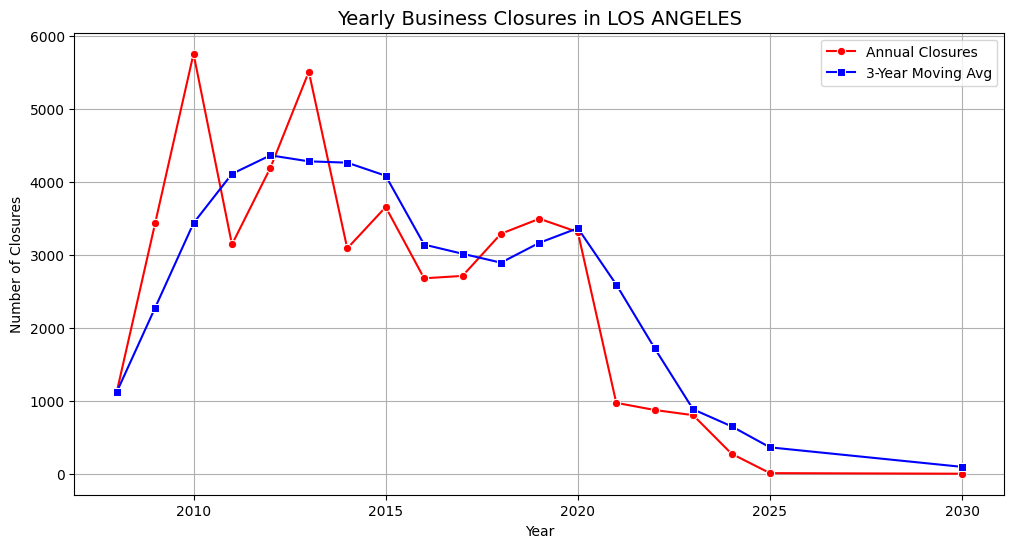

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# (a) Business Lifespan Statistics (Mean, Median, Standard Deviation)
lifespan_stats = df_sj['business_duration_years'].agg(['mean', 'median', 'std'])
lifespan_stats_df = pd.DataFrame(lifespan_stats).transpose()
lifespan_stats_df.columns = ['Mean (Years)', 'Median (Years)', 'Std Dev (Years)']

# Convert years to months for better readability
lifespan_stats_df['Mean (Months)'] = lifespan_stats_df['Mean (Years)'] * 12
lifespan_stats_df['Median (Months)'] = lifespan_stats_df['Median (Years)'] * 12
lifespan_stats_df['Std Dev (Months)'] = lifespan_stats_df['Std Dev (Years)'] * 12

# Display business lifespan statistics
print("Business Lifespan Statistics:")
display(lifespan_stats_df)


# (c) Yearly Business Closure Count & Moving Average
df_sj['Closure_Year'] = df_sj['LOCATION END DATE'].dt.year
yearly_closures = df_sj['Closure_Year'].value_counts().sort_index()

# Calculate 3-year moving average for trend analysis
moving_avg = yearly_closures.rolling(window=3, min_periods=1).mean()

# Plot closures over time with moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_closures.index, y=yearly_closures.values, marker='o', label="Annual Closures", color="red")
sns.lineplot(x=moving_avg.index, y=moving_avg.values, marker='s', label="3-Year Moving Avg", color="blue")

plt.title("Yearly Business Closures in LOS ANGELES", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Closures")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-33-e9f5f9c1d613>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-e9f5f9c1d613>:31: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



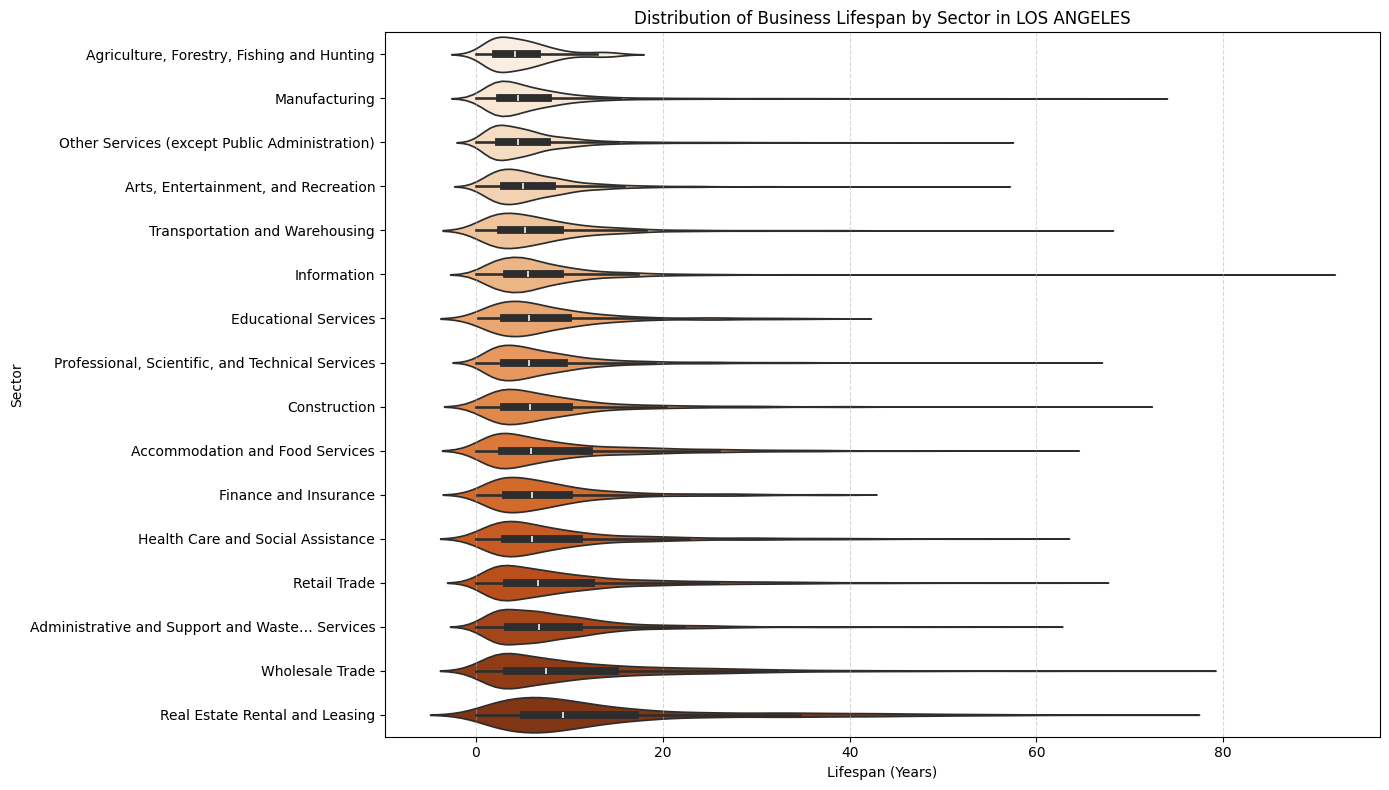

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for LOS ANGELES
df_sj = df_closed[df_closed['CITY'].str.upper() == "LOS ANGELES"].copy()

# Preprocess columns
df_sj['NAICS_Sector_Code'] = df_sj['NAICS'].astype(str).str[:2]
df_sectors['Code'] = df_sectors['Code'].astype(str)
df_sj = df_sj.merge(df_sectors, left_on="NAICS_Sector_Code", right_on="Code", how="left")

# Date conversion and lifespan calculation
df_sj['LOCATION START DATE'] = pd.to_datetime(df_sj['LOCATION START DATE'], errors='coerce')
df_sj['LOCATION END DATE'] = pd.to_datetime(df_sj['LOCATION END DATE'], errors='coerce')
df_sj['business_duration_years'] = (df_sj['LOCATION END DATE'] - df_sj['LOCATION START DATE']).dt.days / 365.25

# Remove invalid lifespans
df_sj = df_sj[df_sj['business_duration_years'] > 0]

# Optional: to limit clutter, keep only sectors with sufficient data
sector_counts = df_sj['Sector_Title'].value_counts()
valid_sectors = sector_counts[sector_counts > 100].index  # keep only sectors with >100 records
df_violin = df_sj[df_sj['Sector_Title'].isin(valid_sectors)]

# Sort sectors by median lifespan
ordered_sectors = df_violin.groupby('Sector_Title')['business_duration_years'].median().sort_values().index

# Plot violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_violin,
    x='business_duration_years',
    y='Sector_Title',
    order=ordered_sectors,
    scale='width',
    inner='box',  # show median and IQR inside
    palette='Oranges'
)
plt.title('Distribution of Business Lifespan by Sector in LOS ANGELES')
plt.xlabel('Lifespan (Years)')
plt.ylabel('Sector')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Business Lifespan Statistics:


,Mean (Years),Median (Years),Std Dev (Years),Mean (Months),Median (Months),Std Dev (Months)
business_duration_years,8.565878,5.963039,8.661263,102.79054,71.556468,103.935158



Yearly Business Closure Statistics:


,Year,Annual Closures,3-Year Moving Avg
0,2008,1119,1119.000000
1,2009,3434,2276.500000
2,2010,5761,3438.000000
3,2011,3145,4113.333333
4,2012,4196,4367.333333
5,2013,5514,4285.000000
6,2014,3091,4267.000000
7,2015,3658,4087.666667
8,2016,2681,3143.333333
9,2017,2714,3017.666667


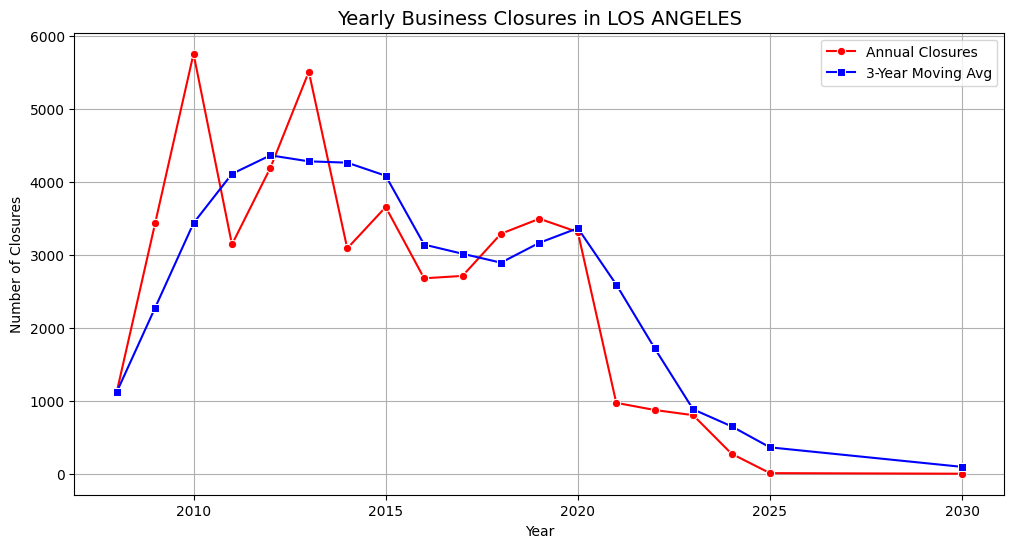

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# (a) Business Lifespan Statistics (Mean, Median, Standard Deviation)
lifespan_stats = df_sj['business_duration_years'].agg(['mean', 'median', 'std'])
lifespan_stats_df = pd.DataFrame(lifespan_stats).transpose()
lifespan_stats_df.columns = ['Mean (Years)', 'Median (Years)', 'Std Dev (Years)']

# Convert years to months for better readability
lifespan_stats_df['Mean (Months)'] = lifespan_stats_df['Mean (Years)'] * 12
lifespan_stats_df['Median (Months)'] = lifespan_stats_df['Median (Years)'] * 12
lifespan_stats_df['Std Dev (Months)'] = lifespan_stats_df['Std Dev (Years)'] * 12

# (c) Yearly Business Closure Count & Moving Average Statistics
df_sj['Closure_Year'] = df_sj['LOCATION END DATE'].dt.year
yearly_closures = df_sj['Closure_Year'].value_counts().sort_index()

# Calculate 3-year moving average for trend analysis
moving_avg = yearly_closures.rolling(window=3, min_periods=1).mean()

# Store the statistics for display
closure_stats_df = pd.DataFrame({
    "Year": yearly_closures.index,
    "Annual Closures": yearly_closures.values,
    "3-Year Moving Avg": moving_avg.values
})

# Display both statistics
print("Business Lifespan Statistics:")
display(lifespan_stats_df)

print("\nYearly Business Closure Statistics:")
display(closure_stats_df)

# Plot closures over time with moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_closures.index, y=yearly_closures.values, marker='o', label="Annual Closures", color="red")
sns.lineplot(x=moving_avg.index, y=moving_avg.values, marker='s', label="3-Year Moving Avg", color="blue")

plt.title("Yearly Business Closures in LOS ANGELES", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Closures")
plt.legend()
plt.grid(True)
plt.show()


ML PART 1

In [ ]:
import pandas as pd

# Load the already partially cleaned dataset
file_path = '/content/Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Drop rows where any of the required columns are missing
required_cols = ['NAICS', 'COUNCIL DISTRICT', 'LOCATION START DATE']
df = df.dropna(subset=required_cols)

# Convert dates to datetime format for later processing
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Remove any rows where conversion failed (invalid dates)
df = df.dropna(subset=['LOCATION START DATE', 'LOCATION END DATE'])

# Filter: Keep only rows where END > START
df = df[df['LOCATION END DATE'] > df['LOCATION START DATE']]

# Reset index
df = df.reset_index(drop=True)

# Save cleaned data to new file
df.to_csv('/content/Cleaned_for_ML.csv', index=False)
print("Final cleaned dataset saved.")

Final cleaned dataset saved.


<ipython-input-36-2f0f25a4f636>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




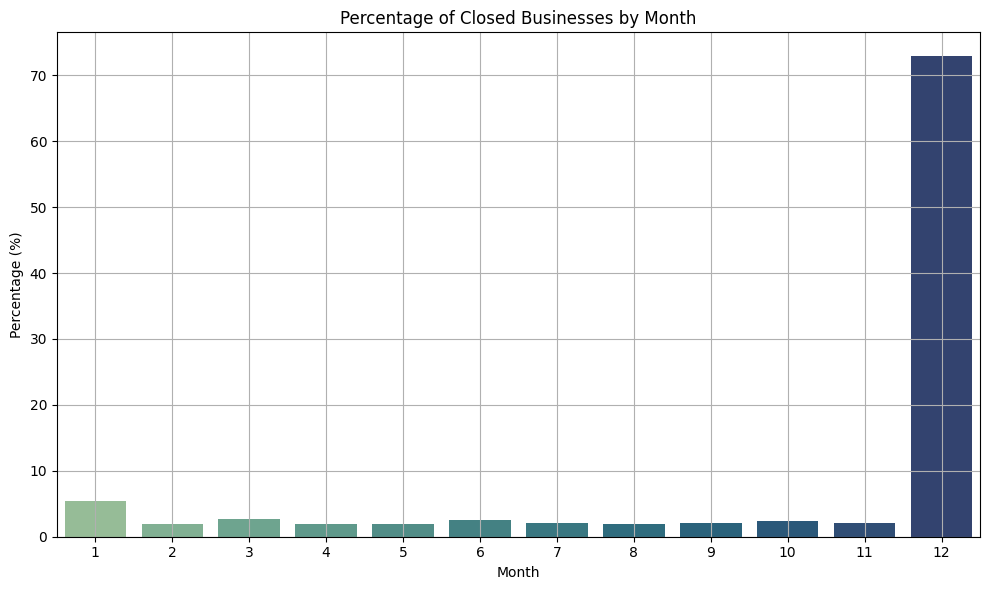

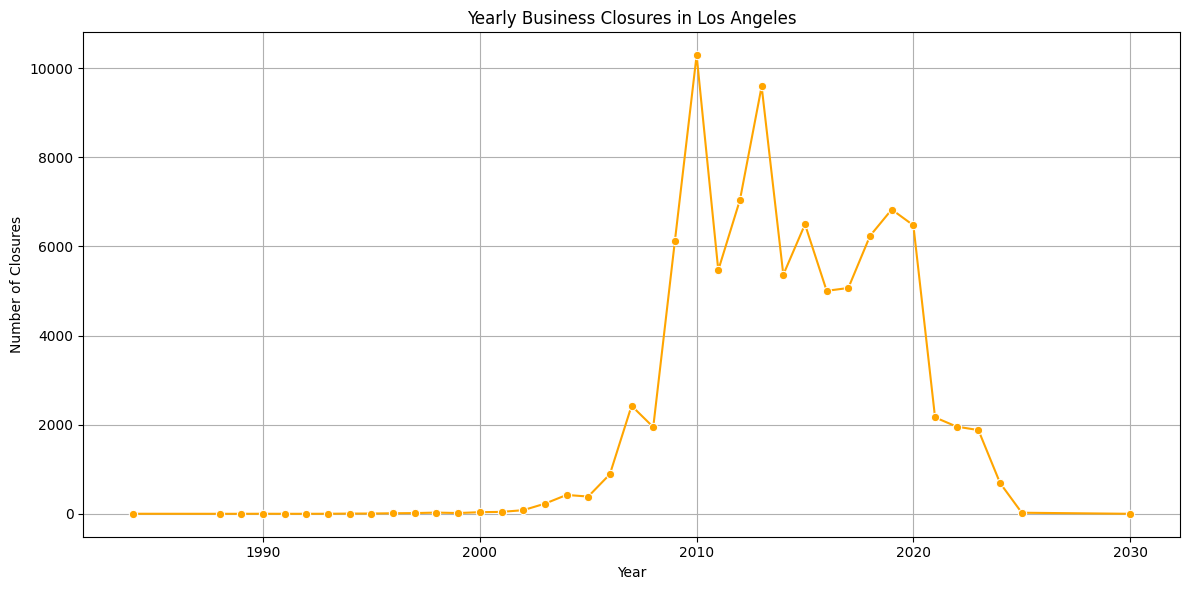

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert dates to datetime format
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract closure month and year
df['Closure_Month'] = df['LOCATION END DATE'].dt.month
df['Closure_Year'] = df['LOCATION END DATE'].dt.year

# Plot 1: Monthly closure percentages (sorted)
month_closure_pct = df['Closure_Month'].value_counts(normalize=True).sort_values(ascending=False) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=month_closure_pct.index, y=month_closure_pct.values, palette='crest')
plt.title('Percentage of Closed Businesses by Month')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Yearly closure counts
yearly_closures = df['Closure_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_closures.index, y=yearly_closures.values, marker='o', color='orange')
plt.title('Yearly Business Closures in Los Angeles')
plt.xlabel('Year')
plt.ylabel('Number of Closures')
plt.grid(True)
plt.tight_layout()
plt.show()


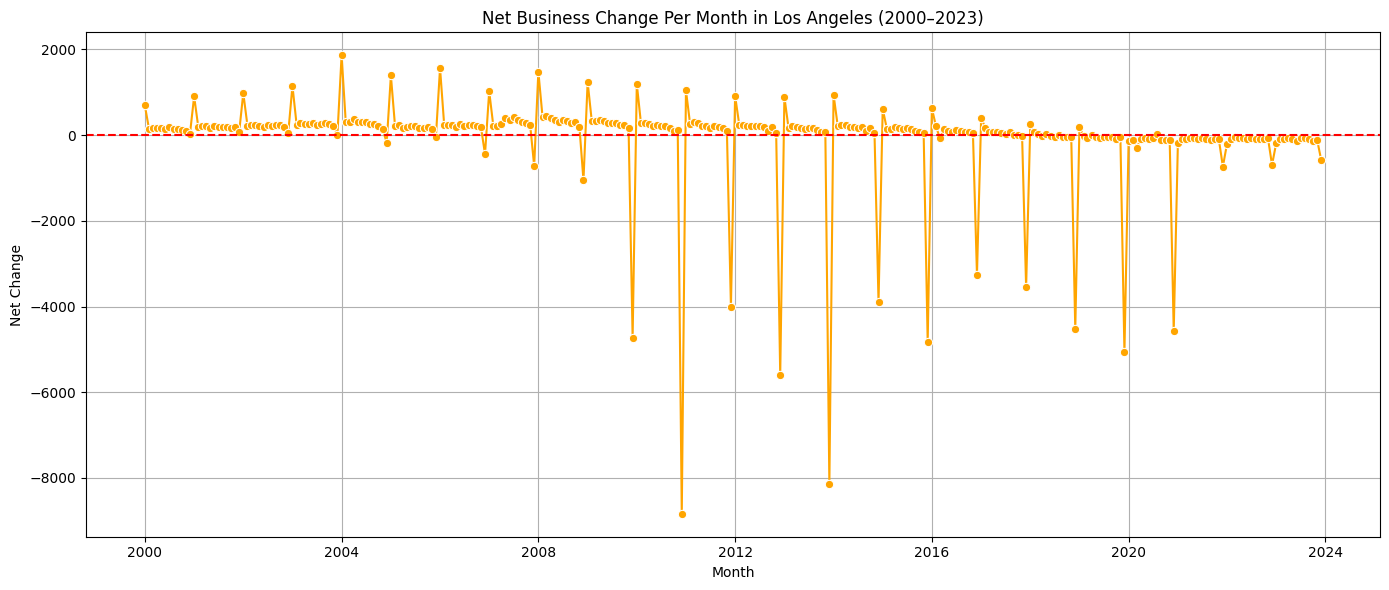

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert date columns to datetime
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract month-period for grouping
df['Start_Month'] = df['LOCATION START DATE'].dt.to_period('M')
df['End_Month'] = df['LOCATION END DATE'].dt.to_period('M')

# Count starts and closures per month
monthly_starts = df['Start_Month'].value_counts().sort_index()
monthly_closures = df['End_Month'].value_counts().sort_index()

# Align both indices and calculate net change
all_months = monthly_starts.index.union(monthly_closures.index).sort_values()
net_change = monthly_starts.reindex(all_months, fill_value=0) - monthly_closures.reindex(all_months, fill_value=0)

# Convert PeriodIndex to timestamp for plotting
net_change.index = net_change.index.to_timestamp()

# Filter to show only years between 2000 and 2023
net_change_filtered = net_change[(net_change.index.year >= 2000) & (net_change.index.year <= 2023)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=net_change_filtered.index, y=net_change_filtered.values, marker='o', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Net Business Change Per Month in Los Angeles (2000–2023)')
plt.xlabel('Month')
plt.ylabel('Net Change')
plt.grid(True)
plt.tight_layout()
plt.show()


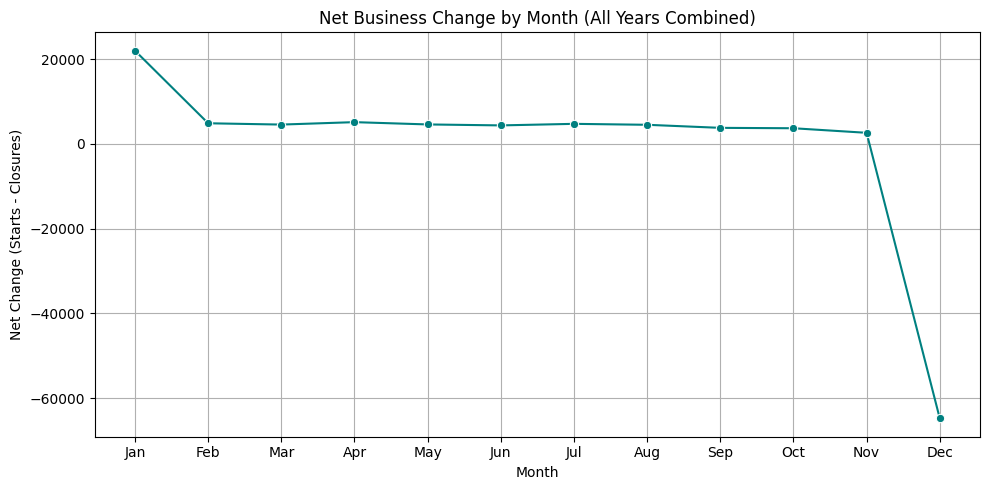

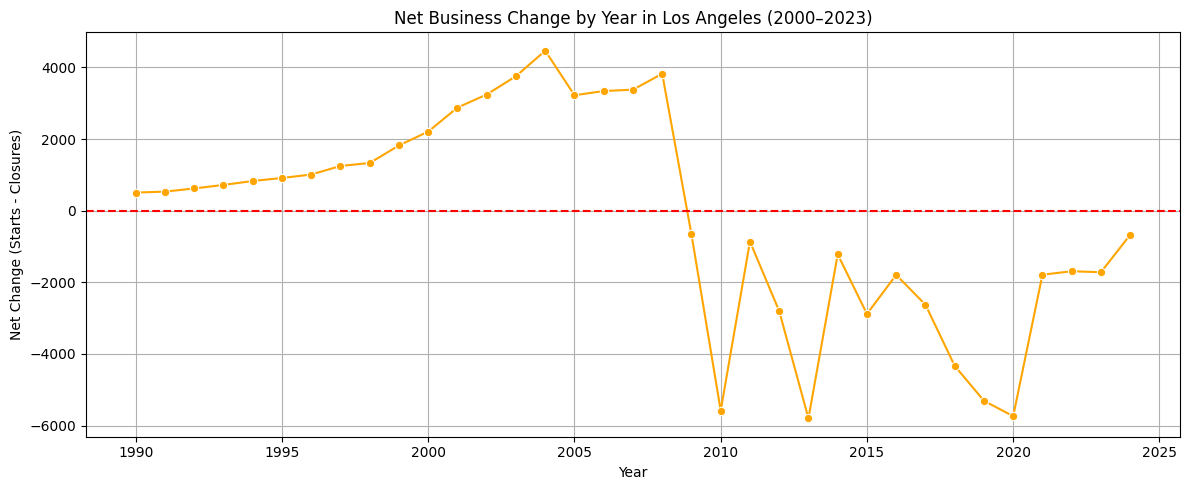

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert to datetime
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract year and month
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['End_Year'] = df['LOCATION END DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['End_Month'] = df['LOCATION END DATE'].dt.month

# ---------- Monthly Net Change (Jan–Dec across all years) ----------
monthly_starts = df['Start_Month'].value_counts().sort_index()
monthly_closures = df['End_Month'].value_counts().sort_index()
monthly_net = monthly_starts - monthly_closures

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_net.index, y=monthly_net.values, marker='o', color='teal')
plt.title('Net Business Change by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Net Change (Starts - Closures)')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# ---------- Yearly Net Change (2000–2023) ----------
yearly_starts = df['Start_Year'].value_counts().sort_index()
yearly_closures = df['End_Year'].value_counts().sort_index()
yearly_net = yearly_starts - yearly_closures
yearly_net = yearly_net[(yearly_net.index >= 1990) & (yearly_net.index <= 2024)]

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_net.index, y=yearly_net.values, marker='o', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Net Business Change by Year in Los Angeles (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Net Change (Starts - Closures)')
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Absolute Error: 34.49 months
R-squared Score: 0.8174


<ipython-input-39-58784264599c>:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




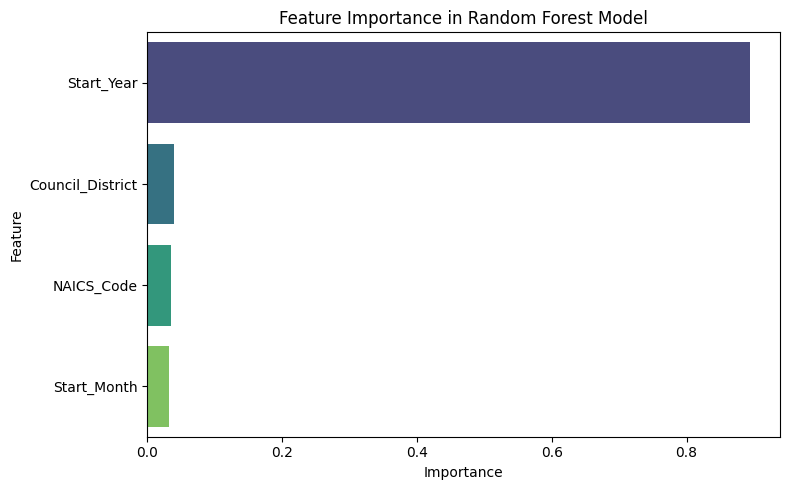

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert dates
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Drop rows with missing start or end dates
df = df.dropna(subset=['LOCATION START DATE', 'LOCATION END DATE'])

# Compute lifespan in months
df['Lifespan_Months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44

# Extract features
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['NAICS_Code'] = df['NAICS'].astype(str).str[:2].astype(int)
df['Council_District'] = df['COUNCIL DISTRICT'].astype(int)

# Define features and target
X = df[['Start_Year', 'Start_Month', 'Council_District', 'NAICS_Code']]
y = df['Lifespan_Months']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} months")
print(f"R-squared Score: {r2:.4f}")

# Optional: Feature Importance Plot
importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

Mean Absolute Error: 32.14 months
R-squared Score: 0.8432


<ipython-input-40-bcfad9038b08>:65: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




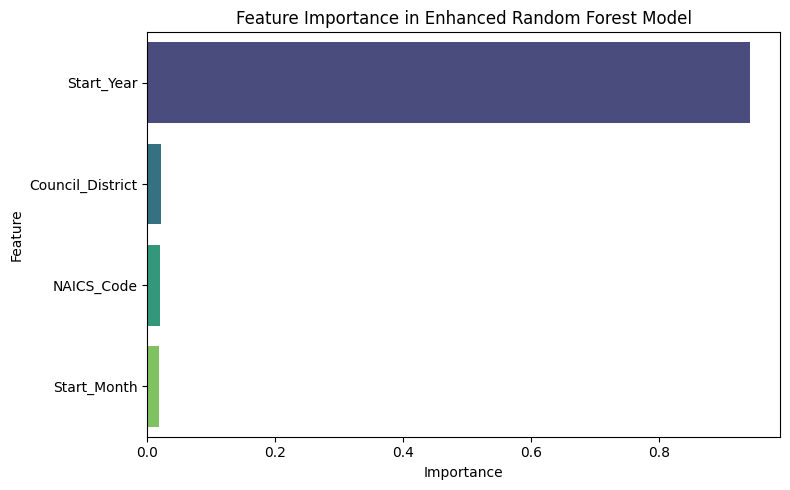

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert date columns
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Drop rows with missing or invalid values
df = df.dropna(subset=['LOCATION START DATE', 'LOCATION END DATE', 'NAICS', 'COUNCIL DISTRICT'])
df = df[df['LOCATION END DATE'] > df['LOCATION START DATE']]

# Compute lifespan
df['Lifespan_Months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44

# Feature extraction
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['NAICS_Code'] = df['NAICS'].astype(str).str[:2].astype(int)
df['Council_District'] = df['COUNCIL DISTRICT'].astype(int)

# Define feature set
features = ['Start_Year', 'Start_Month', 'Council_District', 'NAICS_Code']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X = pd.DataFrame(X_scaled, columns=features)
y = df['Lifespan_Months']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor with tuned hyperparameters
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} months")
print(f"R-squared Score: {r2:.4f}")

# Feature importance
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance in Enhanced Random Forest Model')
plt.tight_layout()
plt.show()


Mean Absolute Error: 32.33 months
R-squared Score: 0.8403


<ipython-input-41-bb8524c8929d>:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




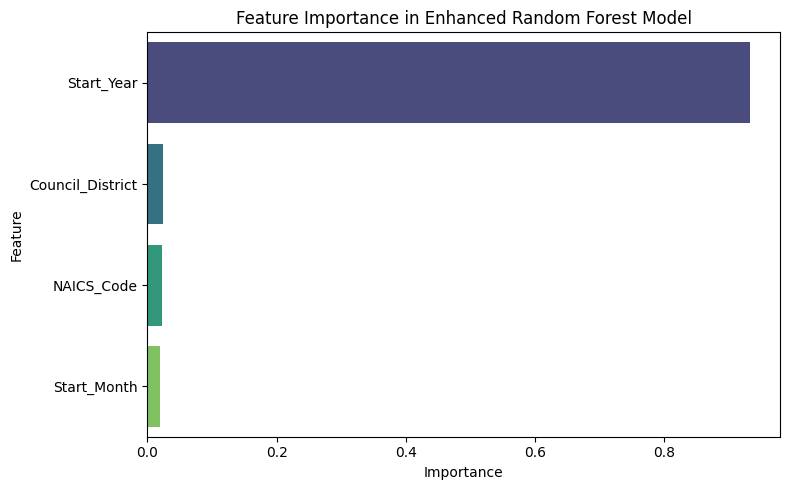


 Predicted Business Lifespan: 9.57 months


np.float64(9.570556359066543)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert date columns
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Drop rows with missing start/end date
df = df.dropna(subset=['LOCATION START DATE', 'LOCATION END DATE'])

# Compute lifespan in months
df['Lifespan_Months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44

# Feature extraction
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['NAICS_Code'] = df['NAICS'].astype(str).str[:2].astype(int)
df['Council_District'] = df['COUNCIL DISTRICT'].astype(int)

# Define input features and target
X = df[['Start_Year', 'Start_Month', 'Council_District', 'NAICS_Code']]
y = df['Lifespan_Months']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} months")
print(f"R-squared Score: {r2:.4f}")

# Plot feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance in Enhanced Random Forest Model')
plt.tight_layout()
plt.show()

# ====== Prediction Function for User Input ======

def predict_lifespan(start_year, start_month, naics_code, council_district):
    # Create input with correct column order
    user_input = pd.DataFrame([[
        start_year,           # Start_Year
        start_month,          # Start_Month
        council_district,     # Council_District
        int(str(naics_code)[:2])  # NAICS_Code (first 2 digits)
    ]], columns=['Start_Year', 'Start_Month', 'Council_District', 'NAICS_Code'])

    # Predict
    predicted_months = rf.predict(user_input)[0]
    print(f"\n Predicted Business Lifespan: {predicted_months:.2f} months")
    return predicted_months


# Example usage
predict_lifespan(start_year=2026, start_month=5, naics_code=44, council_district=12)


In [ ]:
import joblib
import os

# Save the model
joblib.dump(rf, 'random_forest_model.joblib')

# Get the file size
model_size_bytes = os.path.getsize('random_forest_model.joblib')
model_size_mb = model_size_bytes / (1024 * 1024)  # Convert to MB

print(f"Model size: {model_size_mb:.2f} MB")


Model size: 249.81 MB


Mean Absolute Error: 32.31 months
R-squared Score: 0.8407


<ipython-input-43-17495a8c8df2>:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




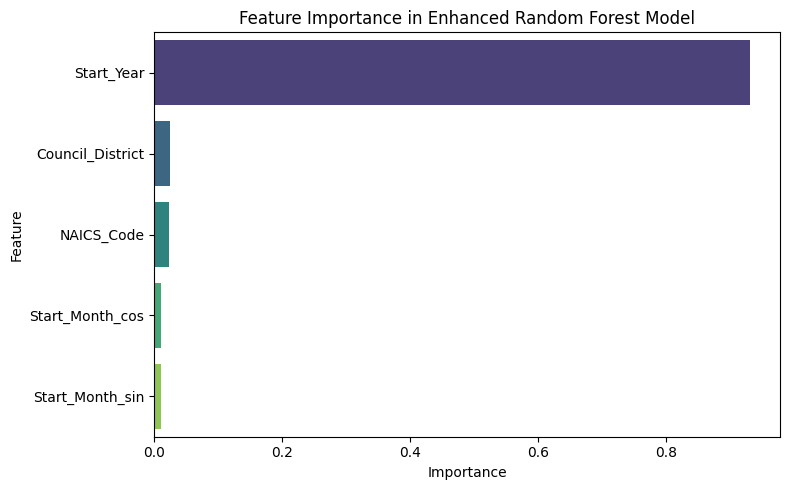


Predicted Business Lifespan: 9.08 months


np.float64(9.08461386675085)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Convert date columns
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Drop rows with missing start/end date
df = df.dropna(subset=['LOCATION START DATE', 'LOCATION END DATE'])

# Compute lifespan in months
df['Lifespan_Months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44

# Feature extraction
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['NAICS_Code'] = df['NAICS'].astype(str).str[:2].astype(int)
df['Council_District'] = df['COUNCIL DISTRICT'].astype(int)

# Cyclical encoding for Start_Month
df['Start_Month_sin'] = np.sin(2 * np.pi * df['Start_Month'] / 12)
df['Start_Month_cos'] = np.cos(2 * np.pi * df['Start_Month'] / 12)

# Define input features and target
X = df[['Start_Year', 'Start_Month_sin', 'Start_Month_cos', 'Council_District', 'NAICS_Code']]
y = df['Lifespan_Months']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} months")
print(f"R-squared Score: {r2:.4f}")

# Plot feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance in Enhanced Random Forest Model')
plt.tight_layout()
plt.show()

# ====== Prediction Function for User Input with Cyclical Features ======

def predict_lifespan(start_year, start_month, naics_code, council_district):
    # Cyclical encoding
    month_sin = np.sin(2 * np.pi * start_month / 12)
    month_cos = np.cos(2 * np.pi * start_month / 12)

    # Create input DataFrame
    user_input = pd.DataFrame([[
        start_year,
        month_sin,
        month_cos,
        council_district,
        int(str(naics_code)[:2])
    ]], columns=['Start_Year', 'Start_Month_sin', 'Start_Month_cos', 'Council_District', 'NAICS_Code'])

    # Predict
    predicted_months = rf.predict(user_input)[0]
    print(f"\nPredicted Business Lifespan: {predicted_months:.2f} months")
    return predicted_months

# Example usage
predict_lifespan(start_year=2026, start_month=5, naics_code=44, council_district=12)


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Cleaned_for_ML.csv')

# Show the number of rows
print("Number of rows:", df.shape[0])

# (Optional) Show both rows and columns
print("Dataset shape (rows, columns):", df.shape)


Number of rows: 93297
Dataset shape (rows, columns): (93297, 16)


In [ ]:
import pandas as pd
from datetime import datetime

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Convert date columns to datetime
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Drop rows with missing critical features (except end date)
df = df.dropna(subset=['NAICS', 'COUNCIL DISTRICT', 'LOCATION START DATE'])

# Handle ongoing businesses: set today's date as LOCATION END DATE where it's missing
today = pd.to_datetime(datetime.today().date())
df['LOCATION END DATE'] = df['LOCATION END DATE'].fillna(today)

# Remove any invalid rows where END < START
df = df[df['LOCATION END DATE'] >= df['LOCATION START DATE']]

# Calculate lifespan in months
df['DURATION_MONTHS'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44

# Create EVENT column: 1 = closed, 0 = still open
df['EVENT'] = (df['LOCATION END DATE'] != today).astype(int)

# Reset index
df = df.reset_index(drop=True)

# Save cleaned dataset for RSF modeling
df.to_csv('/content/Cleaned_for_RSF.csv', index=False)
print("Cleaned dataset for RSF saved as 'Cleaned_for_RSF.csv'")


<ipython-input-45-59c6c0fcb22d>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-59c6c0fcb22d>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-59c6c0fcb22d>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cleaned dataset for RSF saved as 'Cleaned_for_RSF.csv'


In [ ]:
import pandas as pd

# Load the RSF-ready dataset
df_rsf = pd.read_csv('/content/Cleaned_for_RSF.csv')

# Show number of rows
print("Number of rows:", df_rsf.shape[0])


Number of rows: 624345


In [ ]:
pip install scikit-survival


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.3
    Uninstalling osqp-1.0.3:
      Successfully uninstalled osqp-1.0.3


<ipython-input-3-e9831c288172>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event'] = ~df['LOCATION END DATE'].isna()
<ipython-input-3-e9831c288172>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = (
<ipython-input-3-e9831c288172>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Concordance Index (C-index): 0.7574

Predict Business Survival Probability
Enter Start Year (e.g., 2026): 2027
Enter Start Month (1–12): 2
Enter Council District (0–15): 3
Enter NAICS Code (first 2 digits, e.g., 44): 53
Predicted survival probabilities:
Probability of surviving at least 6 months: 49.88%
Probability of surviving at least 12 months: 49.05%
Probability of surviving at least 36 months: 37.36%


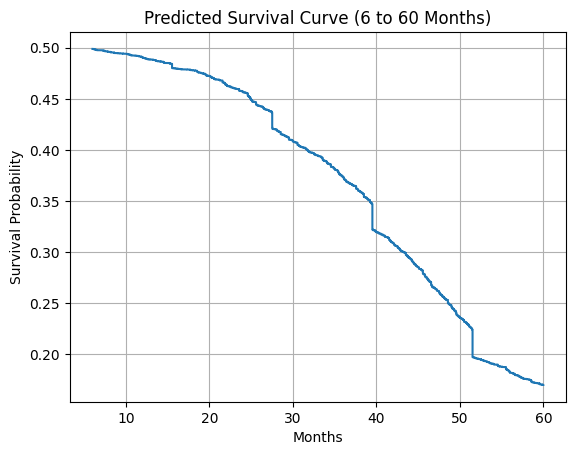

In [ ]:
# Step 1: Imports and Sampling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.model_selection import train_test_split
from sksurv.metrics import concordance_index_ipcw, cumulative_dynamic_auc
from sksurv.nonparametric import kaplan_meier_estimator

# Load your cleaned dataset
df = pd.read_csv('/content/Cleaned_for_RSF.csv')

df = df.sample(n=160000, random_state=42)

# Convert dates
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

df = df[df['LOCATION START DATE'].dt.year > 1980]


# Event column: True if business is closed (has end date), False otherwise
df['event'] = ~df['LOCATION END DATE'].isna()

# Duration column: For open businesses, use today's date
today = pd.Timestamp.today()
df['duration'] = (
    (df['LOCATION END DATE'].fillna(today) - df['LOCATION START DATE']).dt.days / 30.44
)

# Features
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['Start_Month'] = df['LOCATION START DATE'].dt.month
df['NAICS_Code'] = df['NAICS'].astype(str).str[:2].astype(int)
df['Council_District'] = df['COUNCIL DISTRICT'].astype(int)

# Step 2: Prepare Features and Survival Labels
X = df[['Start_Year', 'Start_Month', 'Council_District', 'NAICS_Code']]
y = Surv.from_arrays(event=df['event'], time=df['duration'])

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit RSF Model
rsf = RandomSurvivalForest(
    n_estimators=6,          # fewer trees
    max_depth=5,              # shallower trees
    min_samples_split=100,    # splits only when enough data
    min_samples_leaf=50,      # prevents overgrowth
    max_features="sqrt",      # reduces feature consideration per split
    n_jobs=-1,                # still uses all CPU cores
    random_state=42
)

rsf.fit(X_train, y_train)

cindex = rsf.score(X_test, y_test)
print(f"Concordance Index (C-index): {cindex:.4f}\n")

# Step 5: Define Prediction Function
# Step 5: Define Prediction Function (Updated to show only months 6 to 60)
def predict_survival_function(model, start_year, start_month, council_district, naics_code, time_points=[6, 12, 36]):
    user_input = pd.DataFrame([{
        "Start_Year": start_year,
        "Start_Month": start_month,
        "Council_District": council_district,
        "NAICS_Code": int(str(naics_code)[:2])
    }])

    # Get the survival function for the input
    surv_func = model.predict_survival_function(user_input, return_array=False)[0]

    # Print survival probabilities at key time points
    print("Predicted survival probabilities:")
    for t in time_points:
        prob = float(surv_func(t)) if t <= surv_func.x[-1] else np.nan
        if not np.isnan(prob):
            print(f"Probability of surviving at least {t} months: {prob:.2%}")
        else:
            print(f"Beyond prediction range at {t} months")

    # Plotting from month 6 to 60
    mask = (surv_func.x >= 6) & (surv_func.x <= 60)
    filtered_x = surv_func.x[mask]
    filtered_y = surv_func.y[mask]

    plt.step(filtered_x, filtered_y, where="post")
    plt.title("Predicted Survival Curve (6 to 60 Months)")
    plt.xlabel("Months")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.show()





def interactive_prediction():
    print("Predict Business Survival Probability")
    try:
        start_year = int(input("Enter Start Year (e.g., 2026): "))
        start_month = int(input("Enter Start Month (1–12): "))
        council_district = int(input("Enter Council District (0–15): "))
        naics_code = int(input("Enter NAICS Code (first 2 digits, e.g., 44): "))



        # Call prediction function
        predict_survival_function(
            rsf,
            start_year=start_year,
            start_month=start_month,
            council_district=council_district,
            naics_code=naics_code,
            #time_points=time_points
        )
    except ValueError as e:
        print("Invalid input. Please enter valid numeric values.")

interactive_prediction()


# Example: Predict survival probability
#predict_survival_function(rsf, start_year=2030, start_month=1, council_district=12, naics_code=31)


Predict Business Survival Probability
Enter Start Year (e.g., 2026): 2027
Enter Start Month (1–12): 1
Enter Council District (0–15): 2
Enter NAICS Code (first 2 digits, e.g., 44): 53
Predicted survival probabilities:
Probability of surviving at least 6 months: 49.88%
Probability of surviving at least 12 months: 49.05%
Probability of surviving at least 36 months: 37.36%


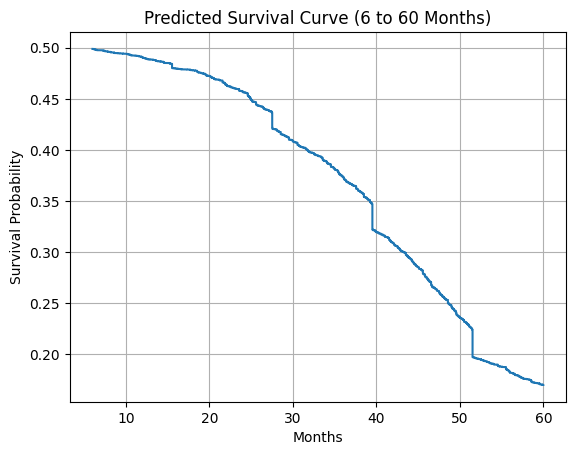

In [ ]:
interactive_prediction()

In [ ]:
interactive_prediction()

In [ ]:
import joblib
import os

# Save the trained model to a file
joblib.dump(rsf, 'rsf_model.joblib')  # or 'rf_model.joblib' if you're using RandomForestRegressor

# Get the size in bytes
model_size_bytes = os.path.getsize('rsf_model.joblib')

# Convert to megabytes
model_size_mb = model_size_bytes / (1024 * 1024)

print(f"Model size: {model_size_mb:.2f} MB")


Model size: 62.60 MB
